# Lecture02

## Feature expansion

### CIS432 Machine Learning for Business Analytics


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm

   X1  X2      Y
0   6  -9  False
1   7   5  False
2  -2   4   True
3   0  -2   True
4  -8   1  False 
 (30, 3)


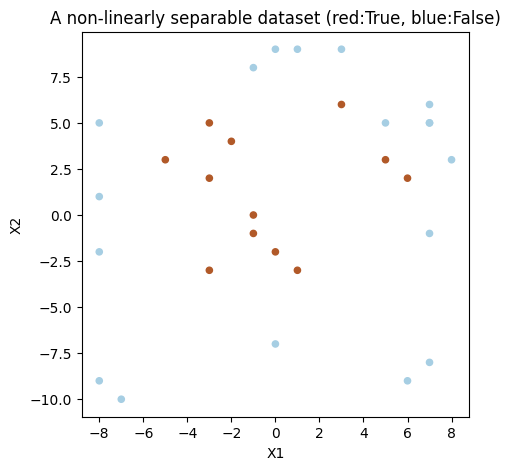

In [ ]:
# Load and visualize a toy dataset
df = pd.read_csv('https://drive.google.com/uc?id=1zeRXawAD0z52NetwncGTfUJe1KOn6zUR&export=download', index_col=0)
print(df.head(), '\n', df.shape)
df.plot.scatter('X1', 'X2', c=df['Y'], cmap=plt.cm.Paired, sharex=False, colorbar=False, figsize=(5,5), title='A non-linearly separable dataset (red:True, blue:False)', legend=True);

In [ ]:
# Compute the performance of linear models on non-linear data
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
X, Y = df[['X1','X2']], df['Y']
clf_svm = svm.SVC(kernel='linear').fit(X, Y)
clf_log = LogisticRegression(random_state=0, C=10**10, solver='liblinear').fit(X,Y)
print(f'SVM accuracy: {accuracy_score(Y, clf_svm.predict(X)):.2f}')
print(f'Log. Reg. accuracy: {accuracy_score(Y, clf_log.predict(X)):.2f}')

SVM accuracy: 0.60
Log. Reg. accuracy: 0.53


In [ ]:
# Computing the expanded featured space
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(2)
X_expanded = poly.fit_transform(X)
print('Features (in):', poly.feature_names_in_)
print('Features (out):', poly.get_feature_names_out())
print('Expanded data matrix\n', X_expanded[:3,:]) # first 3 rows

Features (in): ['X1' 'X2']
Features (out): ['1' 'X1' 'X2' 'X1^2' 'X1 X2' 'X2^2']
Expanded data matrix
 [[  1.   6.  -9.  36. -54.  81.]
 [  1.   7.   5.  49.  35.  25.]
 [  1.  -2.   4.   4.  -8.  16.]]


In [ ]:
# Train linear models again using X_expanded instead of X
clf_svm = svm.SVC(kernel='linear').fit(X_expanded, Y)
clf_log = LogisticRegression(random_state=0, C=10**10, solver='liblinear').fit(X_expanded,Y)
print('SVM accuracy:', accuracy_score(Y, clf_svm.predict(X_expanded)))
print('Log. Reg. accuracy:', accuracy_score(Y, clf_log.predict(X_expanded)))

SVM accuracy: 1.0
Log. Reg. accuracy: 1.0


Return to the presentation

# Additional Figures

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.preprocessing import PolynomialFeatures
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

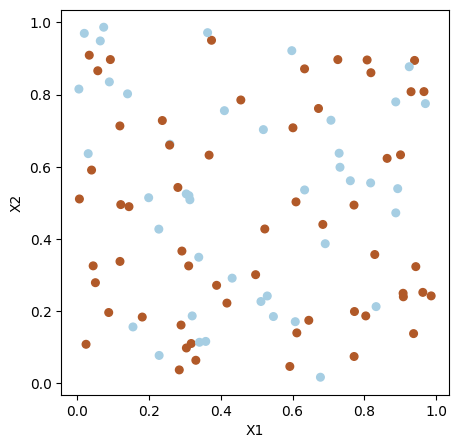

In [ ]:
# Example: a randomly generated dataset
np.random.seed(42)
n = 100
X, Y = np.random.rand(n,2), np.random.rand(n)>0.5
fig, ax = plt.subplots(1,1, figsize=(5,5))
plt.scatter(X[:,0], X[:,1], c=Y, s=30, cmap=plt.cm.Paired, ); plt.xlabel('X1'); plt.ylabel('X2');

In [ ]:
# Training models on datasets with increasingly higher number of features
res = []
for d in range(1,10):
    poly = PolynomialFeatures(d)
    X_expanded = poly.fit_transform(X)
    clf_log = LogisticRegression(C=10**13, solver='liblinear', max_iter=100000, tol=10**-7).fit(X_expanded,Y)
    acc = accuracy_score(Y, clf_log.predict(X_expanded))

    # Compute the minus log-likelihood
    probs = clf_log.predict_proba(X_expanded)
    true_class_probs = probs[np.arange(len(Y)), Y.astype(int)]
    log_likelihood = np.sum(np.log(true_class_probs))
    res.append({"d":d, "X dimensions":X_expanded.shape, "Accuracy":acc, "-log-likelihood":-log_likelihood})

df = pd.DataFrame(res)

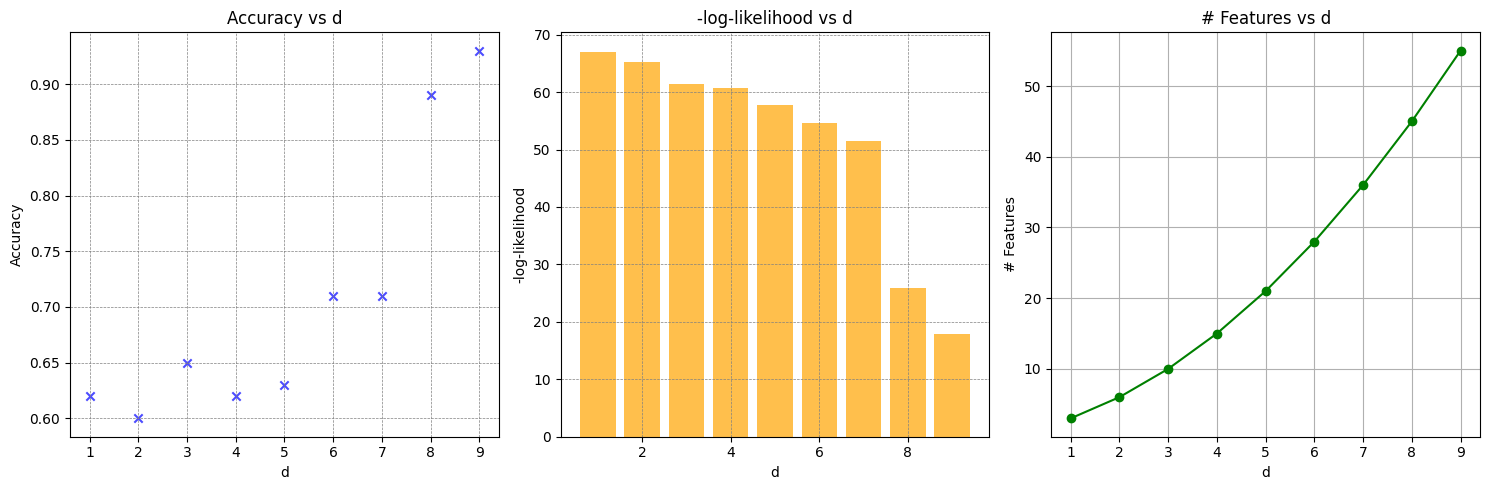

In [ ]:
# Create the plot
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Left Panel: Scatter plot of Accuracy vs d
axes[0].scatter(df["d"], df["Accuracy"], color='blue', alpha=0.7, marker='x')
axes[0].set_title("Accuracy vs d")
axes[0].set_xlabel("d")
axes[0].set_ylabel("Accuracy")
axes[0].grid(color='gray', linestyle='--', linewidth=0.5)

# Right Panel: Bar plot of -log-likelihood vs d
axes[1].bar(df["d"], df["-log-likelihood"], color='orange', alpha=0.7)
axes[1].set_title("-log-likelihood vs d")
axes[1].set_xlabel("d")
axes[1].set_ylabel("-log-likelihood")
axes[1].grid(color='gray', linestyle='--', linewidth=0.5)

# Right Panel: Plot of Second Dimension vs d
df["# Features"] = df["X dimensions"].apply(lambda x: x[1])
axes[2].plot(df["d"], df["# Features"], marker='o', color='green', linestyle='-')
axes[2].set_title("# Features vs d")
axes[2].set_xlabel("d")
axes[2].set_ylabel("# Features")
axes[2].grid(True)  # Enable grid

# Adjust layout and show plot
plt.tight_layout()
plt.show()